# ROOT (PyROOT)

Introduction to ROOT (PyROOT) for the PSI Praktikum 2014. Blablabla


## Example I

In [1]:
# Import the ROOT module 
import ROOT
import rootnotes                         # only used to show root plots in notebooks
import rootprint

If that doesnt work, visit the [PyROOT](http://root.cern.ch/drupal/content/pyroot) website. Make sure the enviornment variables are set according to the manual.

In [2]:
# Declare histograms 
# from  http://root.cern.ch/root/html/TH1F.html
# TH1F(const char* name, const char* title, Int_t nbinsx, Double_t xlow, Double_t xup)

hgaus = ROOT.TH1F("gaus","Gaussian",100,-50,50)  # Declare histogram called "gaus", with title "Gaussian", with 100 bins ranging from -50 to 50
hexpo = ROOT.TH1F("expo","Exponential",100,-50,5)
hsum  = ROOT.TH1F("sum","Sum of Gaussian and Exponential",100,-50,50)

The ROOT histogram base class is called [TH1](http://root.cern.ch/root/html/TH1). All avaiable hisograms are derived from this class. Here we use [TH1F](http://root.cern.ch/root/html/TH1F), a one dimensional histogram which stores float values.

In [ ]:
htest.Fill(4)
...

htest.Draw()

In [3]:
# Fill hisograms with data from a random number generator
# from http://root.cern.ch/root/html/TRandom
# TRandom(UInt_t seed = 65539)
# TRandom.Gaus(Double_t mean = 0, Double_t sigma = 1)

r3 = ROOT.TRandom3()
for i in range(1000):
    # r3.Gaus(0,10) provides a gausion distibuted random number
    # Fill hgaus with 1000 of these numbers
hgaus.Fill(r3.Gaus(0,10))

The histogram "gaus" is filled with 1000 entries generated by a random number generator according to a gauss distribution around 0 with a mean of 10.

In [4]:
# Fill an Exponential
# from http://root.cern.ch/root/html/TF1.html
# TF1(const char* name, const char* formula, Double_t xmin = 0, Double_t xmax = 1)

f1 = ROOT.TF1("exponential","exp([0]*x)",-50,50)
f1.SetParameter(0,-0.05);

# fill hexpo with 1000 numbers generated with f1.GetRandom()
for i in range(1000):
    hexpo.Fill(f1.GetRandom())

[TF1](http://root.cern.ch/root/html/TF1) is a class for 1-dim functions. We use the predefined function "exp" and assign parameter 0 to it.
The TF1 class provides with the function [GetRandom](http://root.cern.ch/root/html/TF1#TF1:GetRandom) the possiblity to shoot random numbers according to itself. The "expo" hisogram is filled with 1000 such random numbers.

In [5]:
hsum = hgaus.Clone()
hsum.Add(hexpo)

TH1F::Add:0: RuntimeWarning: Attempt to add histograms with different axis limits


True

The two histograms are added up by cloning "gaus" into the new hisogram "sum" followed by the addition of "expo". 

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c1


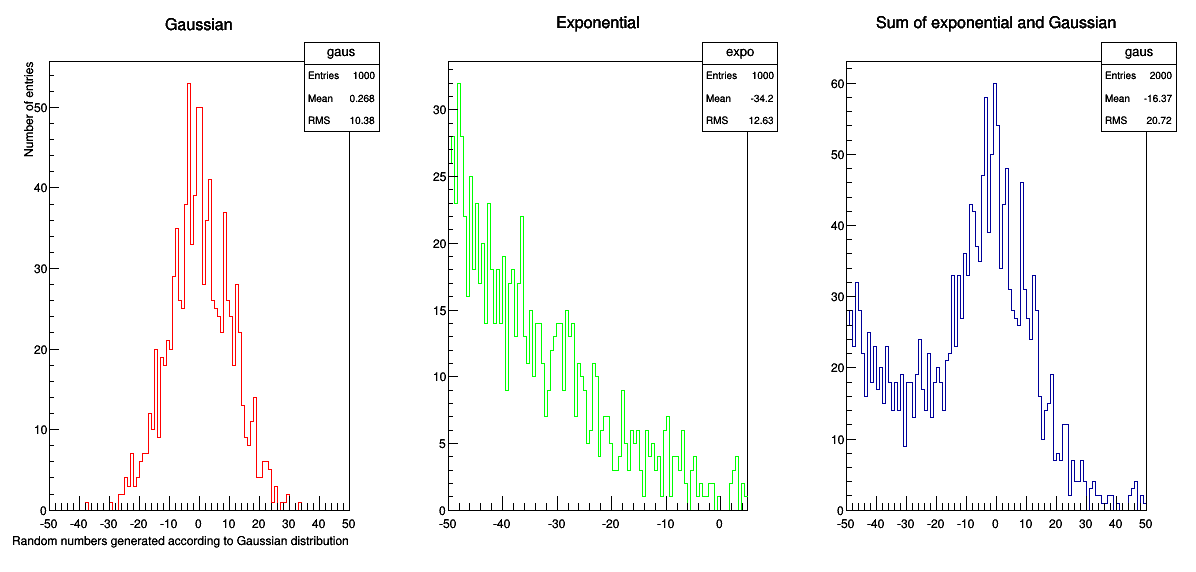

In [9]:
# Create a Canvas and draw the 3 hisograms on it
# from http://root.cern.ch/root/html/TCanvas.html
# TCanvas(const char* name, const char* title, Int_t wtopx, Int_t wtopy, Int_t ww, Int_t wh)


c1 = ROOT.TCanvas("c1","Canvas for Gauss",100,100,1200,600)   # Create canvas called c1, titled "Canvas for Gauss", with dimensions x = 1200 pixel, y = 600 pixel, left top corner at x = 100 pixel, y = 100 pixel
c1 = rootnotes.default_canvas("Canvas for Gauss",(1200,600))
c1.Divide(3,1)                                                # Divide the canvas into 3 pads horizontally

c1.cd(1)                                                      # Switch to first pad
hgaus.Draw()                                                   
hgaus.SetLineColor(ROOT.kRed)                                  # kRed = 632, internal color code for red
hgaus.GetXaxis().SetTitle("Random numbers generated according to Gaussian distribution")
hgaus.GetYaxis().SetTitle("Number of entries")

# Draw hexpo and hsum on pads 2 and 3 in green (kGreen) and blue (kBlue), label the axes
c1.cd(2)                                                      # Switch to second pad
hexpo.SetLineColor(ROOT.kGreen)
hexpo.Draw()

c1.cd(3)                                                      # Switch to third pad
hsum.SetTitle("Sum of exponential and Gaussian")
hsum.Draw()
c1

In [11]:
%%rootprint
# Fit curves to the single hisograms
# from http://root.cern.ch/root/html/TH1.html
# Fit(TF1* f1, Option_t* option = "", Option_t* goption = "", Double_t xmin = 0, Double_t xmax = 0)

hgaus.Fit("gaus")                                              # Fit histogram 'gaus' with predefined function "gaus"
# fit the function called "expo" to the data in hexpo
# and look at the output
hexpo.Fit("expo")                                              # Fit histogram 'expo' with predefined function "expo"

 FCN=65.1586 FROM MIGRAD    STATUS=CONVERGED      68 CALLS          69 TOTAL
                     EDM=3.87547e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.63132e+01   1.52625e+00   4.71626e-03   4.73595e-05
   2  Mean         1.30820e-01   3.47499e-01   1.38022e-03   4.12397e-05
   3  Sigma        1.03413e+01   2.88039e-01   2.86332e-05   1.20620e-02
 FCN=85.1528 FROM MIGRAD    STATUS=CONVERGED      49 CALLS          50 TOTAL
                     EDM=5.13267e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.05155e-01   9.88581e-02   1.55646e-04   3.82255e-04
   2  Slope       -5.64663e-02   2.62781e-03   4.13725e-06  -2.46068e-02



The [TH1](http://root.cern.ch/root/html/TH1.html) baseclass of the TH1F histograms provides a [Fit](http://root.cern.ch/root/html/TH1#TH1:Fit@1) function. Either a predefefined or a user defined function can be used.

In [14]:
# user defined python function for exponential
from numpy import exp

def userFunction(x,par):
    return exp(par[0]+par[1]*x[0])

In [15]:
%%rootprint
# Fit combined histogram
from array import array

gaus_fit = ROOT.TF1("gaus_fit","[0]*exp(-0.5*((x-[1])/[2])^2)",-20,20)  # user-defined as formula
gaus_fit.SetParameter(0,4)                                              # Initialize parameters
gaus_fit.SetParameter(1,0.009)
gaus_fit.SetParameter(2,1)
hsum.Fit("gaus_fit","R")                                                # "R" fit in sub-range

 
expo_fit = ROOT.TF1("expo_fit",userFunction,-50,-20,2)                  # user-defined as python function, exponential in certain range
# Fit in addition expo_fit to the data in hsum
# "R+" option: draw current fit in addition to previous fits
# Set the parameters of expo_fit to 0 and -0.05
expo_fit.SetParameter(0,0)
expo_fit.SetParameter(1,-0.05)
hsum.Fit("expo_fit","R+")                                                # Fit histogram 'sum' with user-defined exponential in sub-range
                                                                        # "R+" option: draw current fit in addition to previous fits

total = ROOT.TF1("total","gaus(0) + expo(3)",-50,20)                    # Define combined function
gaus_par = gaus_fit.GetParameters()                                     # Get parameters from Gaussian fit
expo_par = expo_fit.GetParameters()                                     # Get parameters from exponential fit
par = array( 'd', 9*[0.] )
par[0], par[1], par[2], par[3], par[4] = gaus_par[0], gaus_par[1], gaus_par[2], expo_par[0], expo_par[1]
total.SetParameters(par)                                                # Initialize parameters of combined function with those from previous fits
total.SetLineColor(ROOT.kBlack)
hsum.Fit(total,"R")                                                    # Fit histogram to combined function 

 FCN=53.6612 FROM MIGRAD    STATUS=CONVERGED     167 CALLS         168 TOTAL
                     EDM=1.23776e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   3.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.40735e+01   1.73156e+00   1.61190e-03  -3.56693e-05
   2  p1          -1.79455e+00   4.49533e-01   1.66687e-05   2.74173e-05
   3  p2           1.20658e+01   5.17295e-01  -3.29607e-04   1.39238e-05
 FCN=27.9399 FROM MIGRAD    STATUS=CONVERGED      68 CALLS          69 TOTAL
                     EDM=1.04726e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.20706e+00   2.02450e-01   1.11176e-04  -3.56397e-03
   2  p1          -1.99364e-02   5.42579e-03   2.97411e-06   5.04136e-02
 FCN=78.294 FROM MIG

There are many different ways fit functions can be specified. The user-defined python function offers the biggest flexibility.

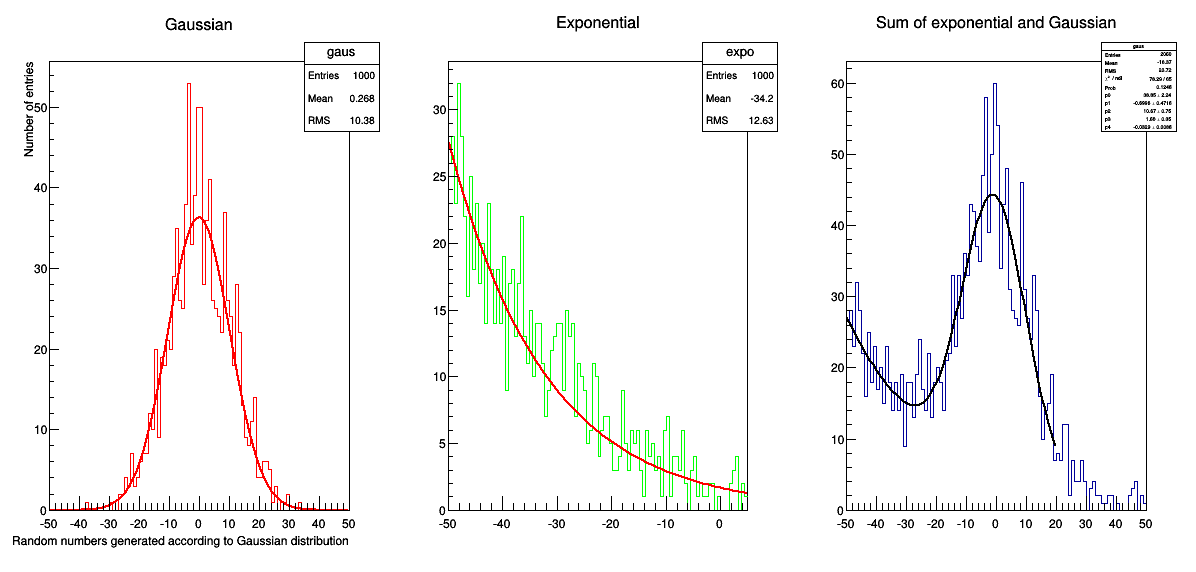

In [16]:
# Show fit results in the plot
# from http://root.cern.ch/root/html/TStyle.html
# SetOptFit(Int_t fit = 1)
#  The parameter mode can be = pcev  (default = 0111)
#    p = 1;  print Probability
#    c = 1;  print Chisquare/Number of degress of freedom
#    e = 1;  print errors (if e=1, v must be 1)
#    v = 1;  print name/values of parameters
c1.cd(3)                                                               # select third pad
ROOT.gStyle.SetOptFit(1111)
c1

The [TStyle](http://root.cern.ch/root/html/TStyle.html) class, accessible by the gStyle pointer, handels global style settings. For example which informations are shown in histograms.

In [12]:
print "Some information about the combined histogram .... : "
print "Bin content of bin # 10: ", hsum.GetBinContent(10)              # # of entries in bin # 10
print "Integral of summed histogram = ", hsum.Integral()               # Total integral of histogram
print "Upper edge of bin # 50 = ", hsum.GetXaxis().GetBinUpEdge(50)    # Upper limit of bin # 50
print "Integral of summed histogram below 0 = ", hsum.Integral(0,50)   # Integral of x-axis range [-50,0], corresponding to bins [0,50]
print "Mean of the Gaus peak = ", total.GetParameter(1)  
print "Decay rate of the exponential part = ", total.GetParameter(4)  
print "**************************************"

Some information about the combined histogram .... : 
Bin content of bin # 10:  23.0
Integral of summed histogram =  1933.0
Upper edge of bin # 50 =  0.0
Integral of summed histogram below 0 =  1275.0
Mean of the Gaus peak =  -0.699554353643
Decay rate of the exponential part =  -0.0329026423874
**************************************


In [13]:
# Save histograms into a root file and as pdf
# from http://root.cern.ch/root/html/TFile.html
# TFile(const char* fname, Option_t* option = "", const char* ftitle = "", Int_t compress = 1)
f = ROOT.TFile("ExampleOutput.root","RECREATE","")
hgaus.Write()  # save histogram 'gaus' as root file
hexpo.Write()
hsum.Write()
c1.Write()    # save canvas as root file
f.Close()

c1.Print("ExampleOutput.pdf","pdf")   # save canvas as pdf file